### 771767_B22_T3A: Applied Artificial Intelligence Assessment Codes

### Student number: 202308338
### Student name: Olawale Omotosho

### Import necessary Libraries

In [16]:
#import libraries
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization

### Data Directories

### Define the paths for the training and testing dataset, set image size and label the categories for the fruits 

In [2]:
train_dir = "C:\\Users\\Big Daddy\\Desktop\\Applied AI\\dataset\\fruitsets"
test_dir = "C:\\Users\\Big Daddy\\Desktop\\Applied AI\\dataset\\Test"
SIZE = (240, 240)
labels = ['rottenbanana', 'freshoranges', 'rottenoranges', 'freshbanana', 'rottenapples', 'freshapples']
NUM_LABELS = len(labels)


### Basic EDA to get a feel of the Images 

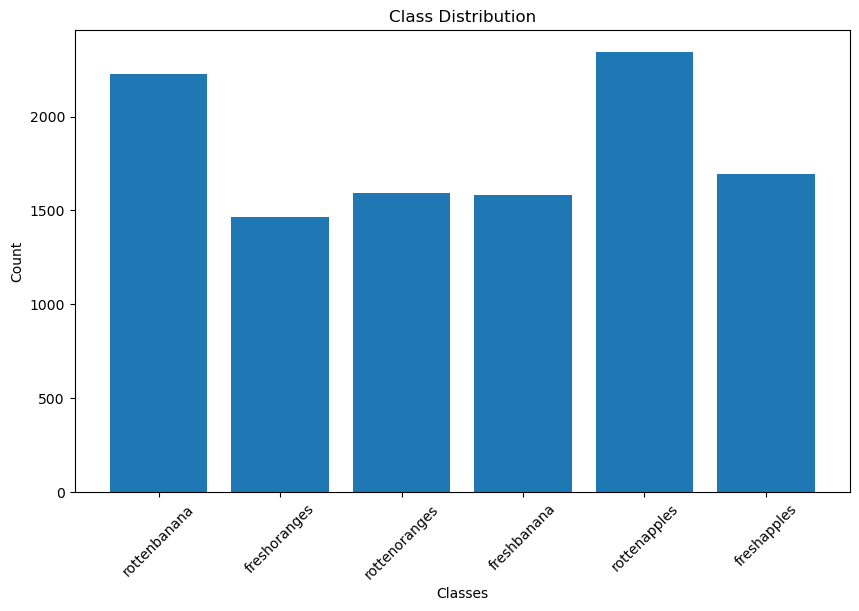

Class Counts:
rottenbanana: 2224
freshoranges: 1466
rottenoranges: 1595
freshbanana: 1581
rottenapples: 2342
freshapples: 1693


In [3]:
#count the class of the dataset
class_counts = {}
for label in labels:
    class_counts[label] = len(os.listdir(os.path.join(train_dir, label)))

#Plotting the class distribution
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.savefig('charts/classdist.png')
plt.show()

#Print the class counts
print("Class Counts:")
for label, count in class_counts.items():
    print(f"{label}: {count}")


### Imbalanced Dataset. Augmentation will be applied from the pre processing. This technique is utilized here as a way to handle the imbalancing problem. Orange is in the minority class

### Data Pre-proccessing

In [4]:
# ImageDataGenerator for training and validation
datagen = ImageDataGenerator(
    rotation_range=20,      #Rotate images by up to 20 degrees
    zoom_range=0.2,         #Zoom in/out by up to 20%
    rescale=1./255,         #Scale pixel value to [0,1]
    validation_split=0.1    #split the training and validation
)

train_dataset = datagen.flow_from_directory(
    batch_size=32,
    directory=train_dir,
    shuffle=True,
    classes=labels,
    target_size=SIZE,
    subset="training",
    class_mode='categorical'
)

val_dataset = datagen.flow_from_directory(
    batch_size=32,
    directory=train_dir,
    shuffle=True,
    classes=labels,
    target_size=SIZE,
    subset="validation",
    class_mode='categorical'
)

Found 9813 images belonging to 6 classes.
Found 1088 images belonging to 6 classes.


### Visualizing the class_labels(fruit labels)

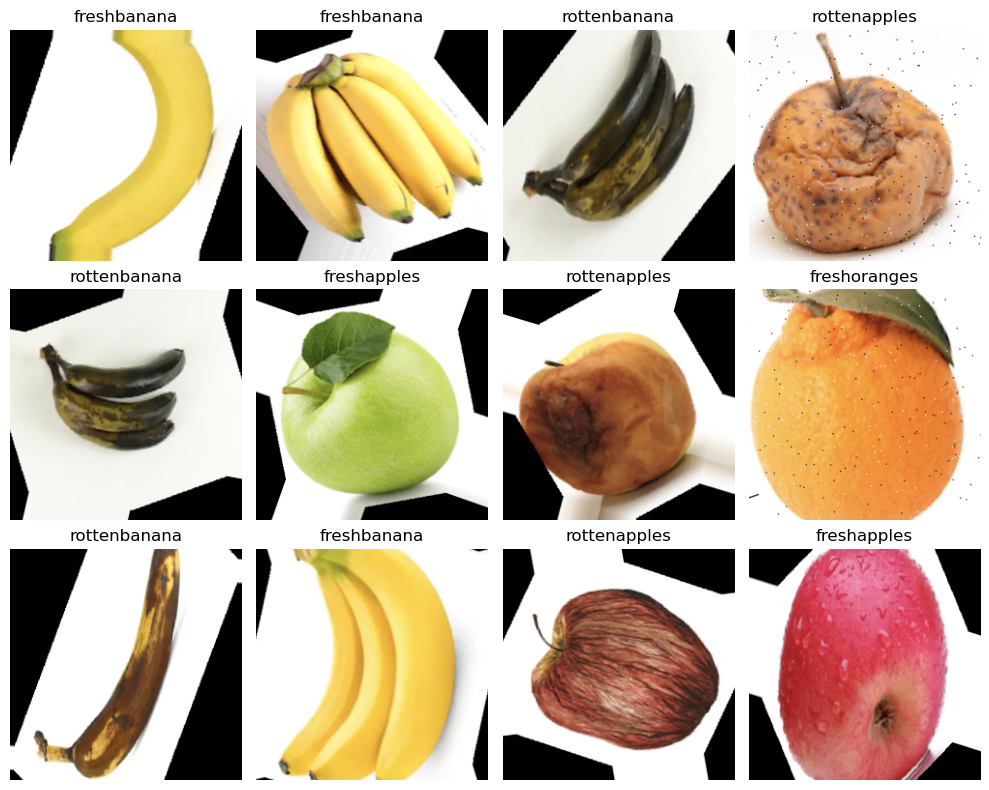

In [5]:
#sampling a batch of images from the dataset
sample_images, sample_labels = next(train_dataset)

#Define class labels
class_labels = labels

#Display images
plt.figure(figsize=(10, 8))
for i in range(12):  # Display 12 images
    plt.subplot(3, 4, i + 1)
    plt.imshow(sample_images[i])
    plt.title(class_labels[sample_labels[i].argmax()])
    plt.axis("off")

plt.tight_layout()
plt.savefig('charts/trainimages.png')
plt.show()


### Building the Model

### I define a convolutional neural network model using the Sequential API. The model consists of convolutional, 
### max-pooling, 
### dropout, and 
### dense layers. 
### It is compiled with the Adam optimizer and categorical cross-entropy loss. The model's summary is displayed to show its architecture and parameter counts

In [6]:
# Build the model
model = Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(240, 240, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(NUM_LABELS, activation='softmax')  # Adjust to NUM_LABELS
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 238, 238, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 119, 119, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 119, 119, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 117, 117, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 58, 58, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 58, 58, 64)        0

### Training the model

In [11]:
#Train the model
history = model.fit(
    x=train_dataset,
    steps_per_epoch=len(train_dataset),
    epochs=12,
    validation_data=val_dataset,
    validation_steps=len(val_dataset)
)

Epoch 1/12
307/307 [==============================] - 552s 2s/step - loss: 1.0142 - accuracy: 0.6079 - val_loss: 0.5422 - val_accuracy: 0.8171
Epoch 2/12
307/307 [==============================] - 596s 2s/step - loss: 0.4055 - accuracy: 0.8598 - val_loss: 0.3751 - val_accuracy: 0.8676
Epoch 3/12
307/307 [==============================] - 561s 2s/step - loss: 0.3116 - accuracy: 0.8882 - val_loss: 0.4826 - val_accuracy: 0.8254
Epoch 4/12
307/307 [==============================] - 579s 2s/step - loss: 0.2680 - accuracy: 0.9046 - val_loss: 0.2496 - val_accuracy: 0.9237
Epoch 5/12
307/307 [==============================] - 583s 2s/step - loss: 0.2294 - accuracy: 0.9150 - val_loss: 0.3289 - val_accuracy: 0.8879
Epoch 6/12
307/307 [==============================] - 566s 2s/step - loss: 0.2090 - accuracy: 0.9208 - val_loss: 0.1723 - val_accuracy: 0.9393
Epoch 7/12
307/307 [==============================] - 578s 2s/step - loss: 0.1735 - accuracy: 0.9363 - val_loss: 0.1587 - val_accuracy: 0.9531

### So far the Model has performed well and will check for any signs of overfitting

### At this point, Checking for Overfitting

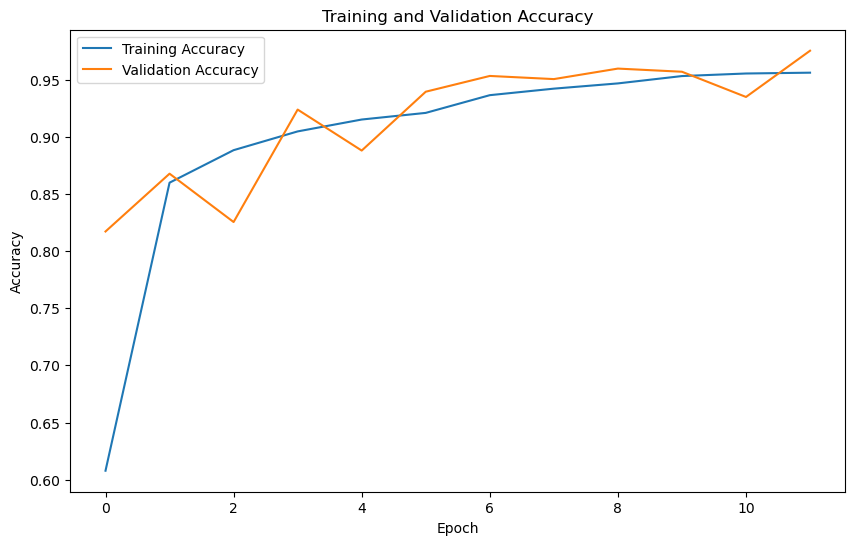

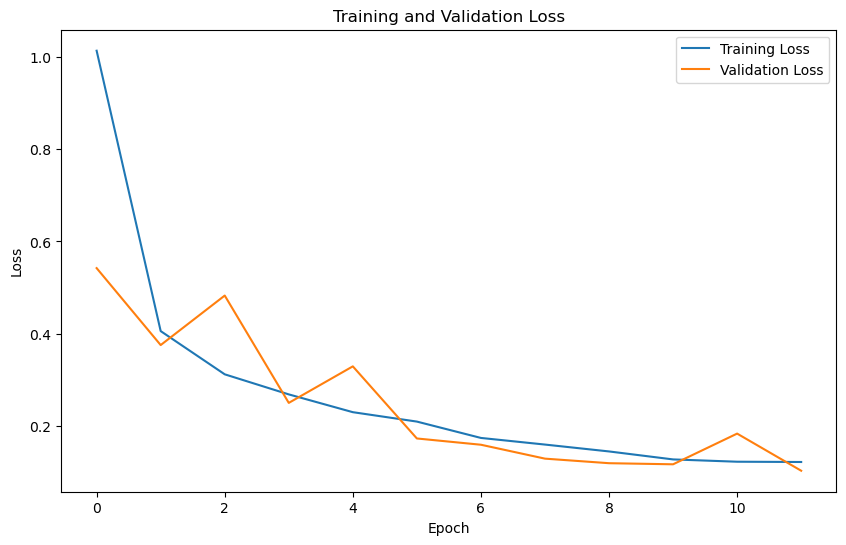

In [12]:
#Plotting the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('charts/trainaccuracy1.png')
plt.show()

#Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('charts/trainloss1.png')
plt.show()


In [19]:
from tensorflow.keras.models import save_model


model.save('CNN_model.h5')


In [ ]:
import tensorflow as tf

### Testing the Model Performance on an unseen test Data set

In [13]:
#Load and preprocess the test dataset
test_datagen = ImageDataGenerator(rescale=1./255)
test_dataset = test_datagen.flow_from_directory(
    batch_size=32,
    directory=test_dir,
    shuffle=False,  # Don't shuffle the test data
    classes=labels,
    target_size=SIZE,
    class_mode='categorical'
)

#Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset, verbose=1)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Found 2698 images belonging to 6 classes.
85/85 [==============================] - 48s 569ms/step - loss: 0.1105 - accuracy: 0.9607
Test Loss: 0.11052358150482178
Test Accuracy: 0.960711658000946


### Classification Report

In [14]:
from sklearn.metrics import classification_report

#Get predictions from the model
predictions = model.predict(test_dataset)
predicted_labels = np.argmax(predictions, axis=1)

#Get labels from the test dataset
true_labels = test_dataset.classes

#Calculate classification report
report = classification_report(true_labels, predicted_labels, target_names=labels)
print(report)


85/85 [==============================] - 29s 334ms/step
               precision    recall  f1-score   support

 rottenbanana       1.00      0.99      0.99       530
 freshoranges       0.98      0.94      0.96       388
rottenoranges       0.92      0.96      0.94       403
  freshbanana       1.00      0.98      0.99       381
 rottenapples       0.90      0.98      0.94       601
  freshapples       1.00      0.91      0.95       395

     accuracy                           0.96      2698
    macro avg       0.97      0.96      0.96      2698
 weighted avg       0.96      0.96      0.96      2698



### Confusion Matrix

85/85 [==============================] - 26s 306ms/step


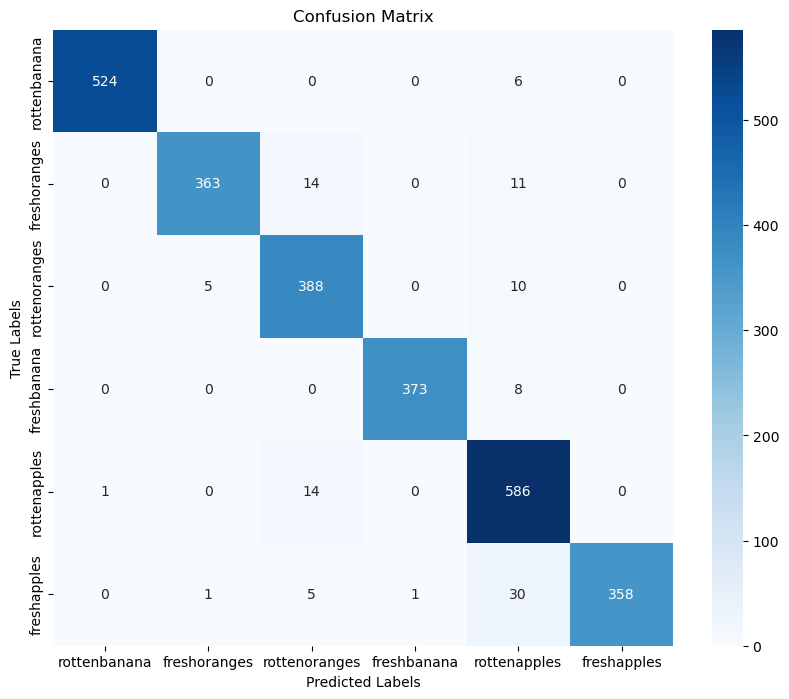

In [17]:
#import confusion matrix
from sklearn.metrics import confusion_matrix

#Get true labels and predictions
true_labels = test_dataset.classes
predictions = model.predict(test_dataset)
predicted_labels = np.argmax(predictions, axis=1)

#Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig('charts/confusionmatrix.png')
plt.show()


### Display a Sample correctly predicted fruit class

85/85 [==============================] - 30s 352ms/step


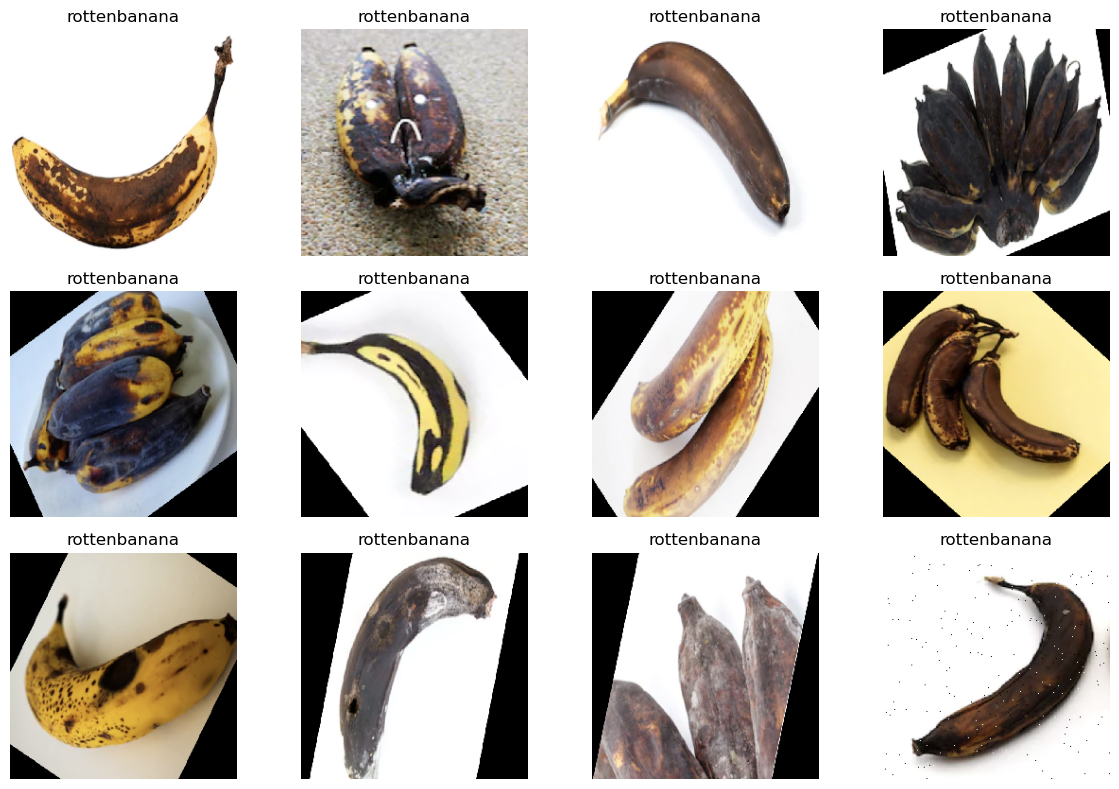

In [18]:
#Get predictions from the model
predictions = model.predict(test_dataset)
predicted_labels = np.argmax(predictions, axis=1)

#Get true labels from the test dataset
true_labels = test_dataset.classes

#Find indices of correctly predicted images
correct_indices = np.where(predicted_labels == true_labels)[0]

# Display a sample of correctly predicted images
plt.figure(figsize=(12, 8))
for i, idx in enumerate(correct_indices[:12]):
    img_batch = test_dataset[idx][0]  # Get the batch of images
    label = labels[predicted_labels[idx]]

    # Take the first image from the batch and reshape it
    img = img_batch[0]
    
    plt.subplot(3, 4, i+1)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

plt.tight_layout()
plt.savefig('charts/testimage.png')
plt.show()


## Experimenting my Model with VGG16 

In [19]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Input
from tensorflow.keras.models import Model
import tensorflow as tf

In [20]:
#Load the VGG16 base model with weights
base_model = VGG16(
    weights='imagenet',
    input_shape=(240, 240, 3),
    include_top=False
)

#Freeze the base model
base_model.trainable = False

In [21]:
#Create new layers for your model
inputs = Input(shape=(240, 240, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
outputs = Dense(NUM_LABELS, activation='softmax')(x)

In [22]:
#Create the model
model = Model(inputs, outputs)

#Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
#Print model summary
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 240, 240, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_3 (Dense)             (None, 6)                 3078      
                                                                 
Total params: 14,717,766
Trainable params: 3,078
Non-trainable params: 14,714,688
_________________________________________________________________


In [24]:
#Train the model
history = model.fit(
    x=train_dataset,
    epochs=6,
    validation_data=val_dataset
)


Epoch 1/6
307/307 [==============================] - 2291s 7s/step - loss: 1.2611 - accuracy: 0.6136 - val_loss: 0.8842 - val_accuracy: 0.7914
Epoch 2/6
307/307 [==============================] - 2300s 7s/step - loss: 0.7804 - accuracy: 0.8172 - val_loss: 0.6352 - val_accuracy: 0.8410
Epoch 3/6
307/307 [==============================] - 2235s 7s/step - loss: 0.6105 - accuracy: 0.8511 - val_loss: 0.5166 - val_accuracy: 0.8787
Epoch 4/6
307/307 [==============================] - 2197s 7s/step - loss: 0.5101 - accuracy: 0.8775 - val_loss: 0.4402 - val_accuracy: 0.8925
Epoch 5/6
307/307 [==============================] - 2189s 7s/step - loss: 0.4489 - accuracy: 0.8881 - val_loss: 0.3874 - val_accuracy: 0.9081
Epoch 6/6
307/307 [==============================] - 2199s 7s/step - loss: 0.4047 - accuracy: 0.8962 - val_loss: 0.3574 - val_accuracy: 0.9072


### Check for overfitting in VGG16_finetuned model

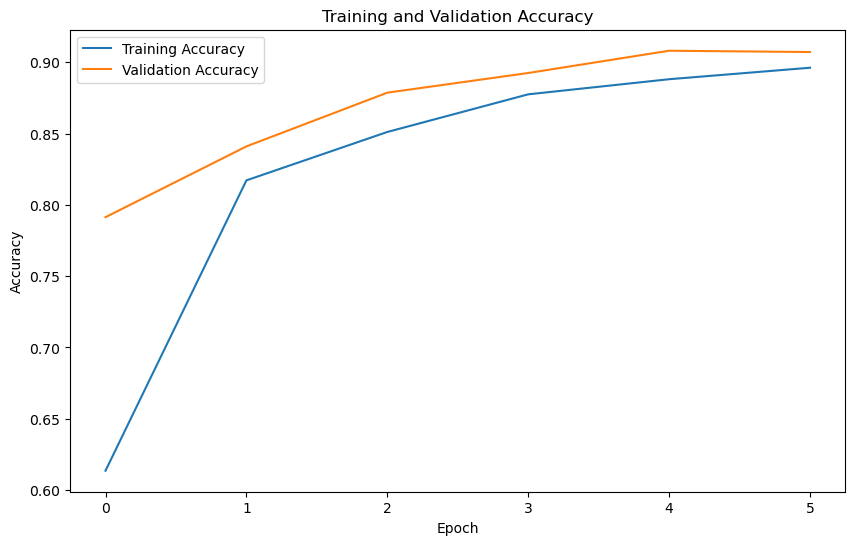

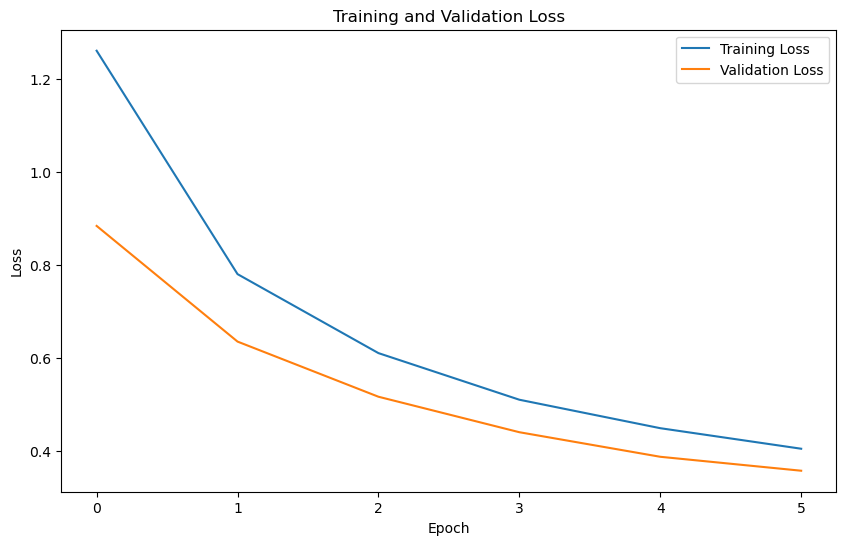

In [29]:
#Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('charts/trainaccuracy.png')
plt.show()

#Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('charts/trainloss.png')
plt.show()

### Now Evaluating the confusion Matrix on my experimented VGG16_finetuned model

85/85 [==============================] - 525s 6s/step


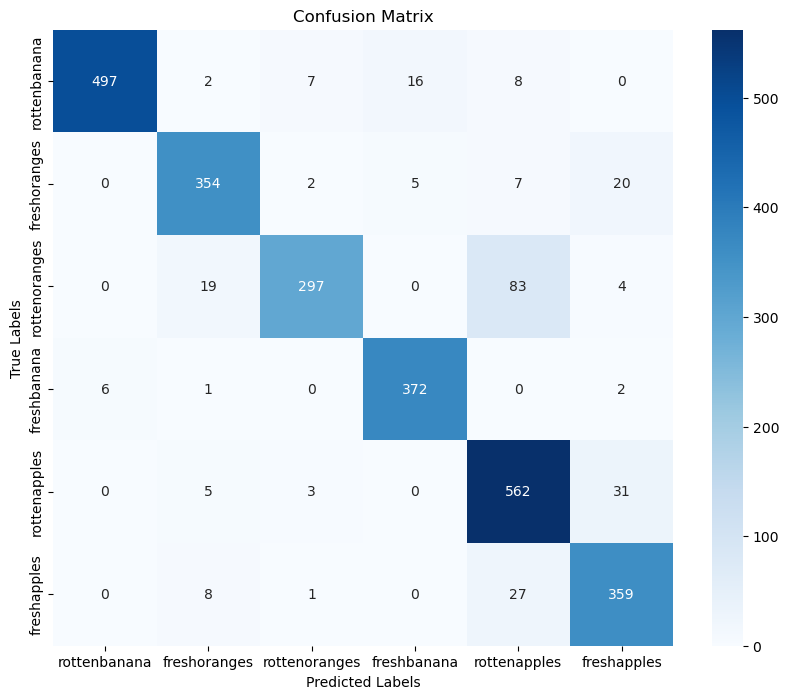

In [30]:
#Get true labels and predictions
true_labels = test_dataset.classes
predictions = model.predict(test_dataset)
predicted_labels = np.argmax(predictions, axis=1)

#Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig('charts/confmatrix.png')
plt.show()

## Experimenting with ResNet Pre rained model

### Loading ResNet base model

In [61]:
from tensorflow.keras.applications import ResNet50
base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(240, 240, 3)
)


### Freeze base model layers

In [62]:
base_model.trainable = False


### Buil Layers for classification

In [64]:
from tensorflow.keras.optimizers import RMSprop

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
outputs = Dense(NUM_LABELS, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=outputs)

# Compile model with RMSprop optimizer
optimizer = RMSprop(learning_rate=0.0001, momentum=0.9)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


### Train the model

In [65]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=7  # You can adjust the number of epochs
)


Epoch 1/7
307/307 [==============================] - 905s 3s/step - loss: 1.3373 - accuracy: 0.4708 - val_loss: 1.4143 - val_accuracy: 0.4118
Epoch 2/7
307/307 [==============================] - 939s 3s/step - loss: 1.0722 - accuracy: 0.5799 - val_loss: 0.9197 - val_accuracy: 0.6517
Epoch 3/7
307/307 [==============================] - 983s 3s/step - loss: 0.9786 - accuracy: 0.6212 - val_loss: 0.8174 - val_accuracy: 0.7050
Epoch 4/7
307/307 [==============================] - 930s 3s/step - loss: 0.9345 - accuracy: 0.6377 - val_loss: 0.7137 - val_accuracy: 0.7574
Epoch 5/7
307/307 [==============================] - 907s 3s/step - loss: 0.8911 - accuracy: 0.6622 - val_loss: 0.7464 - val_accuracy: 0.7206
Epoch 6/7
307/307 [==============================] - 927s 3s/step - loss: 0.8745 - accuracy: 0.6629 - val_loss: 0.6638 - val_accuracy: 0.7564
Epoch 7/7
307/307 [==============================] - 964s 3s/step - loss: 0.8289 - accuracy: 0.6813 - val_loss: 0.6973 - val_accuracy: 0.7500


In [69]:
val_accuracy = history.history['val_accuracy']
print("Validation Accuracy:", val_accuracy)

Validation Accuracy: [0.4117647111415863, 0.6516544222831726, 0.704963207244873, 0.7573529481887817, 0.720588207244873, 0.7564338445663452, 0.75]


### Plotting the Lines for overffiting check

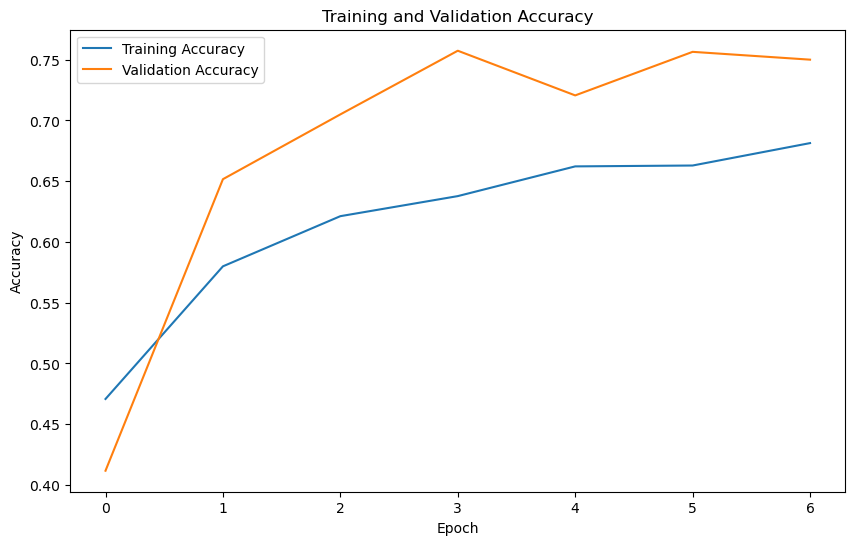

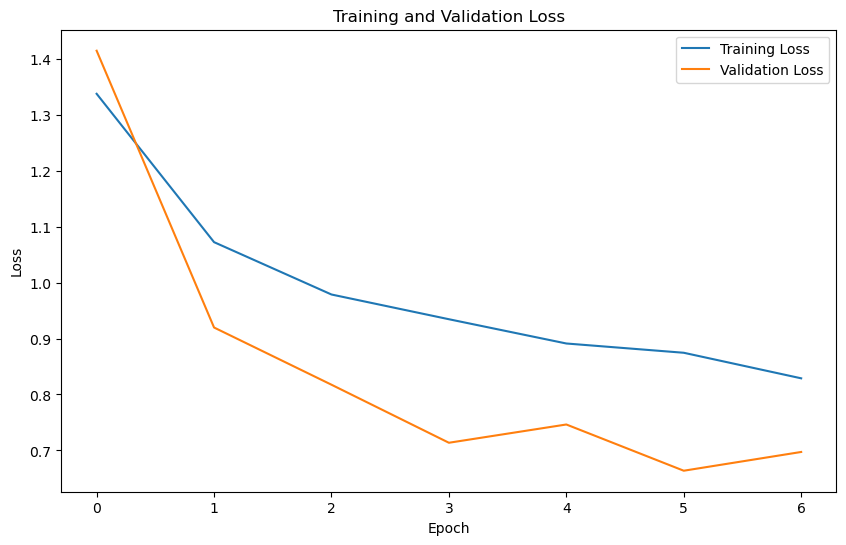

In [71]:
#Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('charts/trainaccuracy2.png')
plt.show()

#Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('charts/trainloss2.png')
plt.show()